In [1]:
import networkx as nx
import matplotlib.pyplot as plt

from networkx.algorithms.tree.mst import SpanningTreeIterator

from itertools import product

from query_graphs.query_graphs import QueryGraphs

i = 0

query_graph = QueryGraphs().get_graph_7(7)

n_joins = len(query_graph.edges) - len(nx.cycle_basis(query_graph))
max_number_of_levels = n_joins
print(max_number_of_levels)
levels = range(max_number_of_levels)
variables = set()
tables = query_graph.nodes()

cardinality = {}
for node in query_graph.nodes(data=True):
    cardinality[node[0]] = node[1]['cardinality']

selectivity = {}
for edge in query_graph.edges(data=True):
    selectivity[(edge[0], edge[1])] = edge[2]['selectivity']

6


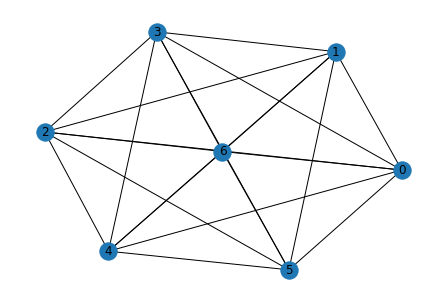

In [2]:
nx.draw(query_graph, with_labels=True)

In [3]:
def label_graph_with_respect_to_joins(query_graphs, level):
    for graph in query_graphs:
        for edge in graph.edges(data=True):
            # If edge does not have a level, assign it to the first level
            if 'level' not in edge[2]:
                edge[2]['level'] = level
                
                for new_edge in query_graph.edges(data=True):
                    if 'level' not in new_edge[2]:
                        
                        source = edge[0]
                        target = edge[1]
                        new_source = new_edge[0]
                        new_target = new_edge[1]
                        
                        if source != new_source and source != new_target and target != new_source and target != new_target:
                        
                            print(source, target, new_source, new_target)
                            
                            shortest_paths = [nx.shortest_path(graph, source, new_source),
                                                nx.shortest_path(graph, source, new_target),
                                                nx.shortest_path(graph, target, new_source),
                                                nx.shortest_path(graph, target, new_target)]
                            print(shortest_paths)
                            add_variable = True
                        
                            for path in shortest_paths:
                                # Loop over the edges on the path
                                for i in range(len(path) - 1):
                                    # If the level of edge is lower than the current one for all edges on the path, then ok
                                    if 'level' in graph[path[i]][path[i+1]]:
                                        if graph[path[i]][path[i+1]]['level'] <= level:
                                            add_variable = False
                                            break
                            
                            if add_variable:
                                new_edge[2]['level'] = level
                                
                        else:
                            continue
                    else:
                        continue
                break
            else:
                continue
            
    return query_graphs

In [4]:
def all_tables_joined(query_graph):
    all_tables = query_graph.nodes()
    joined_tables = nx.Graph()
    for edge in query_graph.edges(data=True):
        if 'level' in edge[2]:
            joined_tables.add_edge(edge[0], edge[1])
    if len(all_tables) == len(joined_tables.nodes()) and nx.is_connected(joined_tables):
        return True
    return False

21
16807


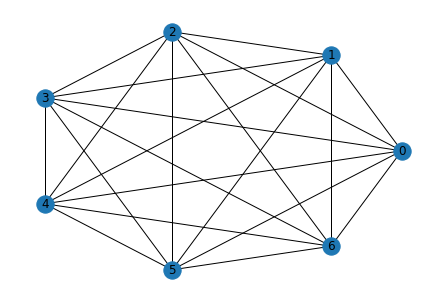

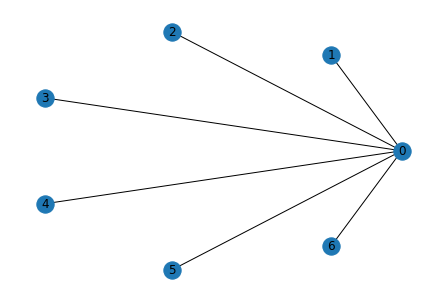

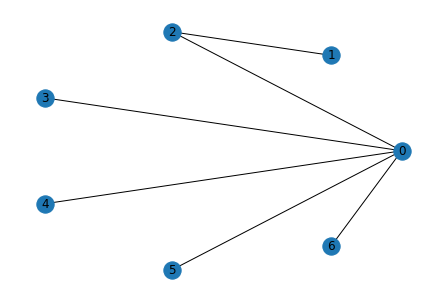

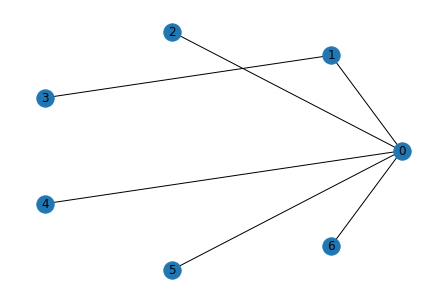

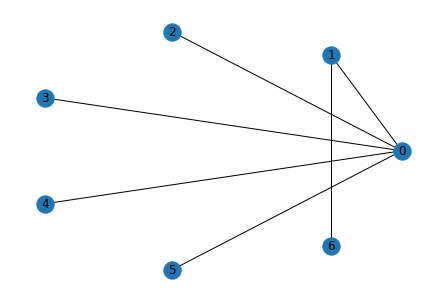

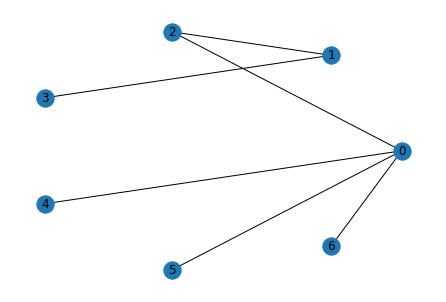

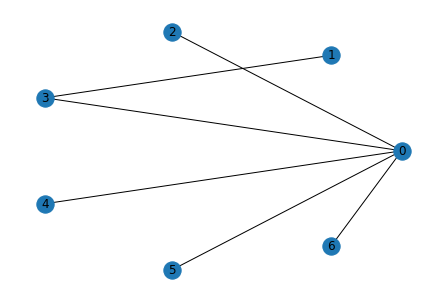

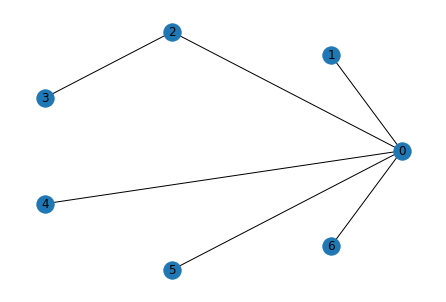

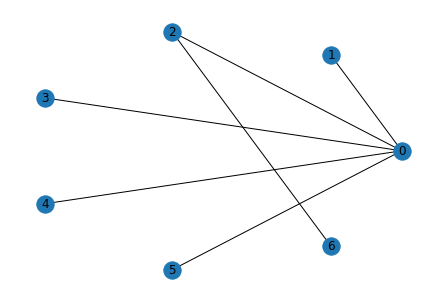

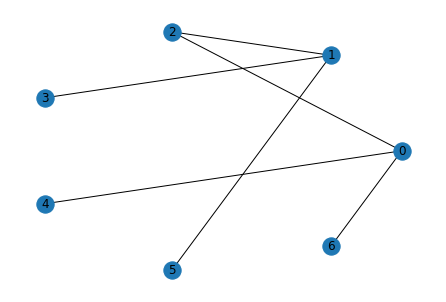

In [6]:
#query_graph[3][4]['level'] = 0
#query_graph[0][5]['level'] = 0
#query_graph[1][2]['level'] = 0

query_graphs = [query_graph]

#for i in range(max_number_of_levels):
    #query_graphs = label_graph_with_respect_to_joins(query_graphs, i)
    #if all_tables_joined(query_graphs[0]):
    #    break

i = 0
for graph in query_graphs:
    plt.figure(i)
    i += 1
    pos = nx.circular_layout(graph)
    nx.draw(graph, with_labels=True, pos=pos)
    nx.draw_networkx_edge_labels(graph, pos=pos, edge_labels=nx.get_edge_attributes(graph, 'level'))

print(len(query_graph.edges()))

print(len([t for t in nx.SpanningTreeIterator(query_graph)]))

for t in nx.SpanningTreeIterator(query_graph):
    plt.figure(i)
    i += 1
    pos = nx.circular_layout(t)
    nx.draw(t, with_labels=True, pos=pos)
    nx.draw_networkx_edge_labels(t, pos=pos, edge_labels=nx.get_edge_attributes(t, 'level'))
    if i == 10:
        break
